In [15]:
import pandas as pd
import pandas as pd
import geopandas as gp
import fiona
import shapely
from fiona.crs import from_epsg
import numpy as np
import choroplethNYC as cp
import matplotlib.pylab as plt

%matplotlib inline

**"day adjusted population"** = precinct residents + ppl who work in precinct - ppl who work and live in the same precinct

In [16]:
#import adjusted daytime population for 2013 (previously cleaned & aggregated)

pop = pd.read_csv('precinct_population_dayadjust.csv')
pop.head(3)

,Unnamed: 0,precinct,resident_pop_x,county,day_allocation,adjusted_day_precinct
0,0,1.0,66751,61.0,271932.341967,338683.341967
1,1,5.0,57779,61.0,59919.357234,117698.357234
2,2,6.0,61230,61.0,40623.963767,101853.963767


In [17]:
pop = pop[['precinct','adjusted_day_precinct']]

In [18]:
#get total day-adjusted population 

total_adjusted_pop = pop['adjusted_day_precinct'].sum()

In [68]:
#make column for the proportion of adjusted-day pop in each precinct 

pop['day_proportion'] = pop['adjusted_day_precinct']/total_adjusted_pop

#make column for the allocation based on this model 

pop['MODEL_allocation'] = np.round((pop['day_proportion']*20000),0)

pop.head(3)

,precinct,adjusted_day_precinct,day_proportion,MODEL_allocation
0,1.0,338683.341967,0.032632,653.0
1,5.0,117698.357234,0.011340,227.0
2,6.0,101853.963767,0.009814,196.0


In [69]:
#export results

pop.to_csv('adjusted_day_MODEL_RESULTS.csv')

In [70]:
#import precinct shapefile

url = 'https://data.cityofnewyork.us/api/geospatial/78dh-3ptz?method=export&format=Shapefile'
precinct = gp.GeoDataFrame.from_file(url)
precinct.head(2)

,precinct,shape_area,shape_leng,geometry
0,1.0,4.730176e+07,80586.154615,(POLYGON ((-74.0438776157395 40.69018767637665...
1,5.0,1.808880e+07,18676.124259,POLYGON ((-73.98863862848766 40.72293372026369...


In [71]:
precinct.shape

(77, 4)

In [72]:
#join to model data

precinct = precinct.merge(pop,on='precinct', how='left')

precinct.shape

(77, 7)

In [73]:
precinct.replace(np.nan,0,inplace=True)

nan = precinct[precinct['MODEL_allocation'].isnull()]
nan

,precinct,shape_area,shape_leng,geometry,adjusted_day_precinct,day_proportion,MODEL_allocation


In [74]:
precinct.to_crs(epsg=2263, inplace=True)
precinct.crs

{'init': 'epsg:2263', 'no_defs': True}

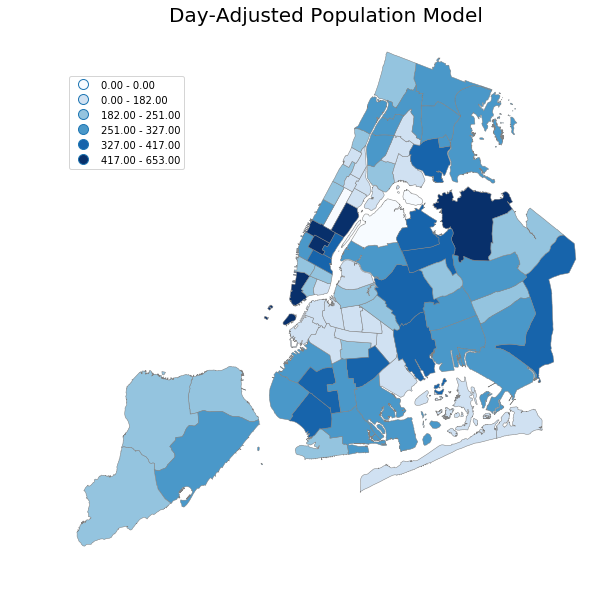

In [86]:
#make cloropleth of precincts shaded by allocation in this model 

f,ax = plt.subplots(figsize=(10,10))
precinct.plot(column='MODEL_allocation', cmap="Blues", edgecolor="grey",ax=ax,
              scheme='fisher_jenks',k=6, lw=.5, legend=True)
ax.axis('off')
plt.title('Day-Adjusted Population Model' ,fontsize=(20))

leg = ax.get_legend()
leg.set_bbox_to_anchor((0,-.08,.25,1));